# Reactions vs Reality: Processing the Data
This notebook was put together by Taylor Hixson (taylorhixson@gmail.com) for the paper presentation of "Reactions vs Reality: Using sentiment analysis to understand university students confidence of concepts while learning ArcGIS" at the IASSIST 2019 conference in Sydney, Australia. The notebook details going through the sentiment analysis process with VADER and visualizing the data.

Most of this data was processed using a Mac OS and Google Chrome, so some commands and instructions may vary.

## What is VADER?

VADER was built for social media text and uses capitalized words, punctutation, and even emojis to process sentiment. It is great for analyzing an potentially emotionally charged short text responses.

### VADER citation:
Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

# Installing libraries

These instructions for installing Python libraries are best suited for Mac OS. These methods may vary on other operating systems.

**Python library requirements**: nltk, vaderSentiment, twython

1. Instructions for installing the nltk library: https://www.nltk.org/install.html
2. Install the vaderSentiment library by opening Terminal on a Mac OS (or Windows equivalent) and use: pip install vaderSentiment
3. Install the vader dependency library twython: pip install twython

In [20]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#following line only necessary first time to download the vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/twh2/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Prepping data


In Google Sheets I did the following on the columns with text response data:
1. Click a cell in an empty column and type =CONCATENATE
2. Use something similar to the following in bold between the CONCATENATE function parantheses (): **"±",A2,"±",","**. A2 represents whatever column the text data is in. Using a special character as a place holder for a quotation mark may not be necessary, but it is what ultimately worked for me.
3. Copy this function down the column.
4. Copy and paste the column with values only (cmd + shift + v in Google Sheets) into a new column.
5. Use Cmd + F to open the find. Click the three stacked buttons for more options.
6. In find type the special character from the concatenate function. In this case **±** and replace with **"**. 
7. Delete the comma (,) at the end of the **very last cell** with a text response.
8. Copy the text responses that have just been prepped in Google Sheets--do **not** copy any column headings.
9. In the Jupyter Notebook, create an empty array ( [ ] ) and make that array equal (=) to list. That is, **list = [ ]**
10. Paste the text from Google into the empty array ([ ]).


In [2]:
list = ["",
"the properties of different files (vectors, tabular,etc) and how to properly save",
"I learned that ArcMap can be used to represent elevation data using a color gradient.",
"How arcMap works",
"how to save a project file as a map package",
"To save maps using share map not by clicking save.",
"The basics of ArcSIG",
"Layering appropriately (following the relevant order).",
"ArcMap",
"There is a lot of stuff to learn in future",
"How to choose specific projections for my maps.",
"projecting ",
"connecting folders ",
"There are many different map projections, and depending on what you are working on, some projections will be more suited for you needs compared to others.",
"One thing i learned is how many different types of projections exist and how they have different functions or uses ",
"I learn how to make a shape file and how to save it as a map package.",
"How to shift between map projections of different types based on need. ",
"How to achieve certain map projections, whether for the world or regionally.",
"Different Map Projections",
"The basics of arcgis.",
"Different types of geospatial data (Projecting, Raster, Tabular, and Vector) and their differences.",
"How to make different projections through using different geographic spatial data. Moreover, how to get started in using the ArcMap in general.",
"How to convert tabular data to points in a .shp file.",
"Georeferencing",
"how to make geo reference image file",
"That georeferencing is extremely important in ensuring that your unprojected map data becomes accurate for further analysis.",
"Learnt how to geo reference a map to make it lay (almost) perfectly on another map",
"how to create shapefiles",
"Georeferencing",
"",
"how to georeference maps",
"Georeferencing",
"Georeference ",
"Georeferencing",
"how to georeference",
"How to create shape files and georeference.",
"",
"creating new shape files",
"",
"how to create features",
"",
"I learned how to draw polygons!",
"How to georeference a map using three different ways.",
"The part where we had extracted mask was interesting to learn ",
"Adding Legend",
"how to add legend,scale bar and title",
"How to make some sort of a map.",
"Creating final file",
"Exporting Maps, Labeling, etc",
"How to make a map for export",
"how to add a legend"]

# Sentiment Intensity Analyzer

The function **print_sentiment_scores** makes the output much easier to read. I did not write this function. I [found it here](http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html), and he mentions this is provided by the authors of the algorithm. 

I used **sid** as the argument for SentimentIntensityAnalyzer function because that's what was shown being used in the [DataCamp course](https://www.datacamp.com/courses/analyzing-social-media-data-in-python) I watched. However, in the link above, the author uses analyser as the argument. Try both!

In [3]:
sid = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = sid.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

# The for loop

In [4]:
# The for loop may be used in the print_sentiment_scores function above, too
for week in list:
    print_sentiment_scores(week)

---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
the properties of different files (vectors, tabular,etc) and how to properly save {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4939}
I learned that ArcMap can be used to represent elevation data using a color gradient. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
How arcMap works------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
how to save a project file as a map package {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.4939}
To save maps using share map not by clicking save. {'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'compound': 0.8225}
The basics of ArcSIG-------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Layering appropriately (following the relevant order). {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ArcMap---------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
There is a 

# The results

Copy and paste the results as values only (cmd + shift + v) into an empty column in Google Sheets. As long as the data in Google Sheets has not been sorted since running this, then they should be sorted correctly.
Now, do some data cleaning in Google Sheets or another software to get everything neatly in a format to analyze with other metrics in the sheet. I used things like split text to columns and find and replace.
The only metric needed from the results is `'compound'`, so delete everything else as you see fit. I'm sure all of this data cleaning could be done with Python and Pandas, but this is what worked for me!

# Visualizing the sentiment compound scores


## Getting the data
- Once the compound scores are all cleaned up in the Google Sheeta, click **File>Download as>Comma-separated values (.csv)**
- Change the CSV name to something more simple like analysis.
- Place it on the Desktop or somewhere with easy access and a short file path.
- To get the file path on a **Mac** right click the file and press alt.
- To get the file path on a **PC** hold down shift on the keyboard and right click the file.
- In both of these, an option to **copy as a path or pathname** will appear.

### [Download sample data](https://drive.google.com/open?id=1hOtXa9Puun9MNrk88FyKMCt8PPW2EVVb)

## Python Libraries
The libraries in the following cell come with any installation of [Anaconda](https://docs.anaconda.com/anaconda/). 


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Create a dataframe
# Paste your file path between the quotations (" "). Below is a dummy path.

df = pd.read_csv("/Users/user/Desktop/analysis.csv")

In [7]:
# Make sure the file looks correct by printing the head, or first five lines.
print(df.head())

    Week                                              clear  \
0  Week1  How to make different projections through usin...   
1  Week1                               The basics of ArcSIG   
2  Week1  How to shift between map projections of differ...   
3  Week1                                        projecting    
4  Week1                                             ArcMap   

                                               muddy  ClearCompound  \
0  It was difficult to understand what WGS 1984 i...            0.0   
1                                                  /            0.0   
2  How to spatially orient a map in a space from ...            0.0   
3  I can follow the steps, but I will never be ab...            0.0   
4                                                NaN            0.0   

   MuddyCompound  AverageCompound  
0        -0.5696          -0.2848  
1         0.0000           0.0000  
2         0.0000           0.0000  
3         0.0000           0.0000  
4         0.00

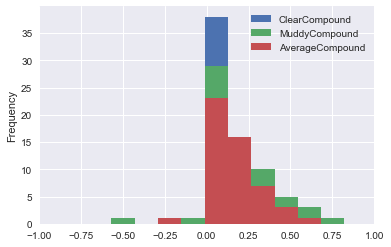

In [8]:
# Use seaborn styles
sns.set()

# Create a simple histogram
    # Bins is not required, but try changing bins from 10 to 5
    # X limit is not required, but I like it show the span of VADER being from -1 to +1
df.plot.hist(bins=10, xlim=(-1,1))

# Show the plot in Jupyter Notebook
plt.show()

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


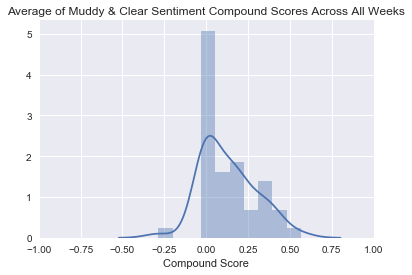

In [9]:
# Use seaborn styles
sns.set()

# Create the distribution plot
# Don't want the distribution line in the result? Insert kde=False
ax = sns.distplot(df['AverageCompound'],
            bins=10)

# Don't want the x limit to be larger than the results? Remove xlim
ax.set(xlabel="Compound Score",
        xlim=(-1, 1),
      title="Average of Muddy & Clear Sentiment Compound Scores Across All Weeks")

# To save a visualization, do not use plt.show(), use plt.draw() and then plt.savefig() 
# In plt.savefig() place a file path within quotations 
# and set a dpi for a higher quality image
# Below is a dummy path--either insert your own path or use plt.show()
plt.draw()
plt.savefig("/Users/user/Desktop/images/distplot.png", dpi=900)

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


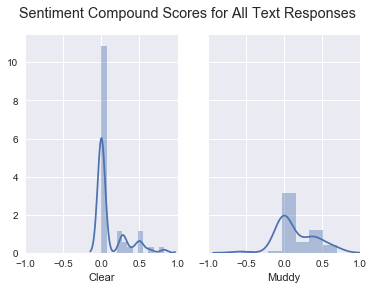

In [10]:
# Set seaborn style
sns.set()

# Create a plot with 1 row and 2 columns that share the y axis label
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

# Plot the distribution of Average Clear compound sentiment scores ax0
sns.distplot(df['ClearCompound'], ax=ax0)
ax0.set(xlabel="Clear", xlim=(-1,1))

# Plot the distribution of Average Muddy compound sentiment scores on ax1
sns.distplot(df['MuddyCompound'], ax=ax1,)
ax1.set(xlabel="Muddy", xlim=(-1,1))

# Add a main title to the figure
fig.suptitle('Sentiment Compound Scores for All Text Responses')

# plt.show() is not required in Jupyter notebook, but I like to use it out of habit
plt.show()

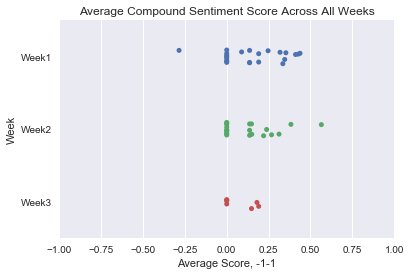

In [11]:
# Create a strip plot
sns.set()

ax = sns.stripplot(data=df,
         x='AverageCompound',
         y='Week',
         jitter=True)

ax.set(xlabel="Average Score, -1-1",
      xlim=(-1, 1),
       title="Average Compound Sentiment Score Across All Weeks")

plt.show()

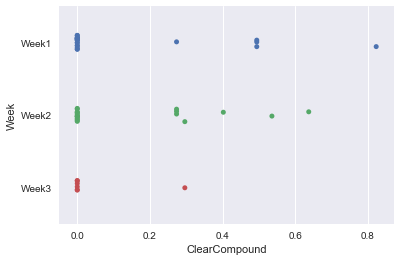

In [12]:
sns.stripplot(data=df,
         x='ClearCompound',
         y='Week',
         jitter=True)

plt.show()

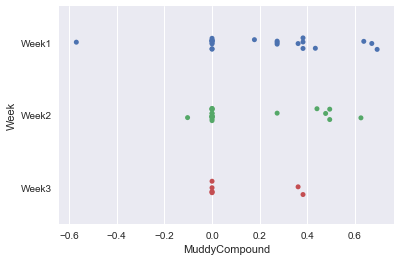

In [13]:
sns.stripplot(data=df,
         x='MuddyCompound',
         y='Week',
         jitter=True)

plt.show()

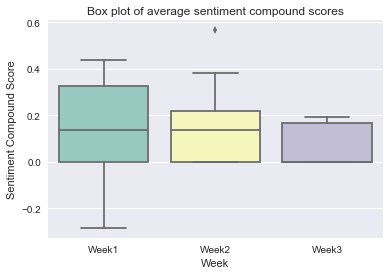

In [14]:
# Create a boxplot
sns.set()
ax = sns.boxplot(data=df,
         x='Week',
         y='AverageCompound',
        palette="Set3")

ax.set(ylabel="Sentiment Compound Score",
      title="Box plot of average sentiment compound scores")

plt.show()

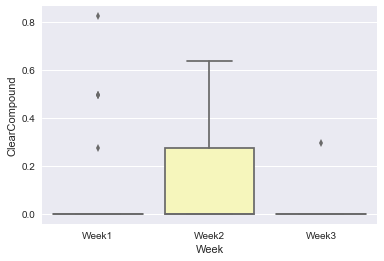

In [15]:
# Create a boxplot
sns.boxplot(data=df,
         x='Week',
         y='ClearCompound',
        palette="Set3")

plt.show()

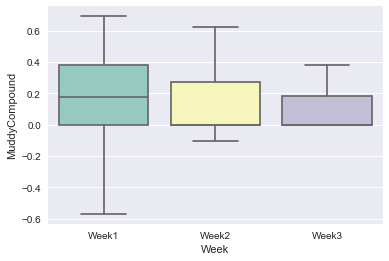

In [16]:
# Create a boxplot
sns.boxplot(data=df,
         x='Week',
         y='MuddyCompound',
        palette="Set3")

plt.show()

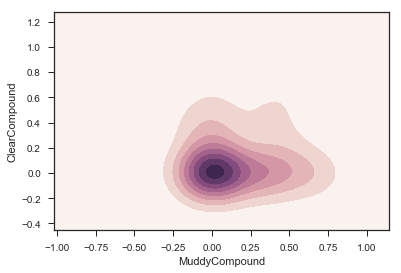

In [17]:
# Create a kernel density plot
sns.set_style("ticks")
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.kdeplot(df.MuddyCompound,df.ClearCompound, 
            cmap=cmap, shade=True, bw=.15, shade_lowest=True)

plt.show()

Text(0.5,0,'Sentiment Score')

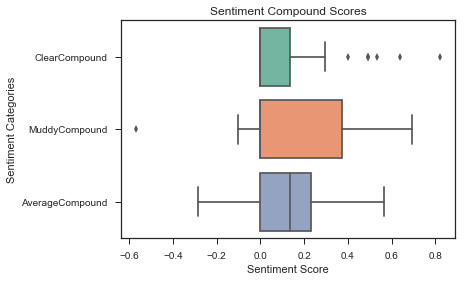

In [19]:
# Create a horizontal box plot
ax = sns.boxplot(data=df, orient="h", palette="Set2")
ax.set_title('Sentiment Compound Scores')
ax.set_ylabel('Sentiment Categories')
ax.set_xlabel('Sentiment Score')